In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import pingouin as pg

df = pd.read_csv("./NHP_BG_anal/NHP_BG_AIT_115/204_349/NHP_BG_204_349_AIT115_ann_map_roi_QC_wglia_clus_PCA.csv")

In [41]:
df.columns

Index(['Unnamed: 0', 'exp_component_name', 'Row.names', 'score.Corr',
       'score.Tree', 'level1.class_Corr', 'level2.neighborhood_Corr',
       'level3.subclass_Corr', 'cluster_Corr', 'level1.class_Tree',
       ...
       'level2.neighborhood_Tree_wglia', 'level3.subclass_Tree_wglia',
       'cluster_Tree_wglia', 'compound_qc_pass', 'cluster', 'PC1', 'PC2',
       'PC3', 'PC4', 'PC5'],
      dtype='object', length=197)

In [3]:
acute = df['cell_specimen_project']=='qIVSCC-METa'
sum(acute)

849

In [165]:
culture = df['cell_specimen_project']=='qIVSCC-METc'
sum(culture)

220

In [230]:
clus5 = df['cluster']== 4   # 0 indexed
sum(clus5)

59

In [231]:
clus4 = df['cluster']== 3   # 0 indexed
sum(clus4)

85

In [232]:
clus2 = df['cluster']== 1   # 0 indexed
sum(clus4)

85

Text(0.5, 1.0, 'PC1 (cultured samples)')

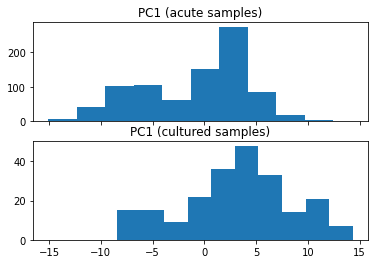

In [7]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].hist(df[acute]['PC1'])
ax[0].set_title('PC1 (acute samples)')
ax[1].hist(df[culture]['PC1'])
ax[1].set_title('PC1 (cultured samples)')
# PC1 - Pan-neuronal genes, predominantly cultured contam

Text(0.5, 1.0, 'PC2 (cluster 4)')

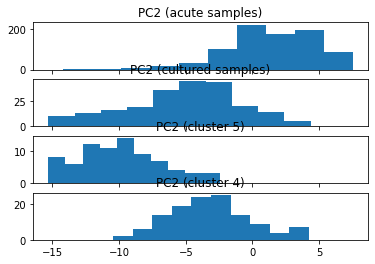

In [8]:
fig, ax = plt.subplots(4,1,sharex=True)
ax[0].hist(df[acute]['PC2'])
ax[0].set_title('PC2 (acute samples)')
ax[1].hist(df[culture]['PC2'])
ax[1].set_title('PC2 (cultured samples)')
ax[2].hist(df[clus5]['PC2'])
ax[2].set_title('PC2 (cluster 5)')
ax[3].hist(df[clus4]['PC2'])
ax[3].set_title('PC2 (cluster 4)')
# PC2 - MSN genes

Text(0.5, 1.0, 'PC2 (cluster 4)')

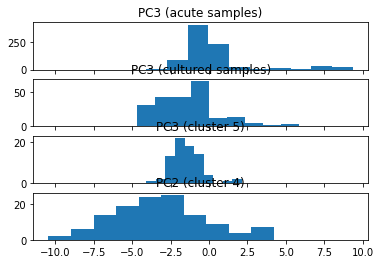

In [9]:
fig, ax = plt.subplots(4,1,sharex=True)
ax[0].hist(df[acute]['PC3'])
ax[0].set_title('PC3 (acute samples)')
ax[1].hist(df[culture]['PC3'])
ax[1].set_title('PC3 (cultured samples)')
ax[2].hist(df[clus5]['PC3'])
ax[2].set_title('PC3 (cluster 5)')
ax[3].hist(df[clus4]['PC2'])
ax[3].set_title('PC2 (cluster 4)')    # Probably cause there are very few interneurons coming from culture?
# PC3 - IN genes

Text(0.5, 1.0, 'PC4 (cultured samples)')

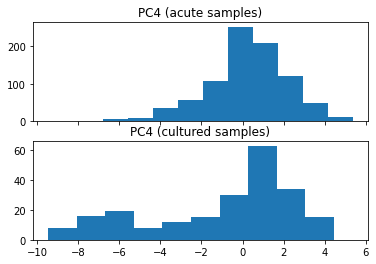

In [10]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].hist(df[acute]['PC4'])
ax[0].set_title('PC4 (acute samples)')
ax[1].hist(df[culture]['PC4'])
ax[1].set_title('PC4 (cultured samples)')
# PC4 - pan-neuronal genes

Text(0.5, 1.0, 'PC5 (cluster 5)')

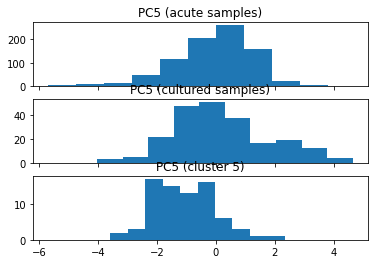

In [11]:
fig, ax = plt.subplots(3,1,sharex=True)
ax[0].hist(df[acute]['PC5'])
ax[0].set_title('PC5 (acute samples)')
ax[1].hist(df[culture]['PC5'])
ax[1].set_title('PC5 (cultured samples)')
ax[2].hist(df[clus5]['PC5'])
ax[2].set_title('PC5 (cluster 5)')
# PC5 - microglial genes

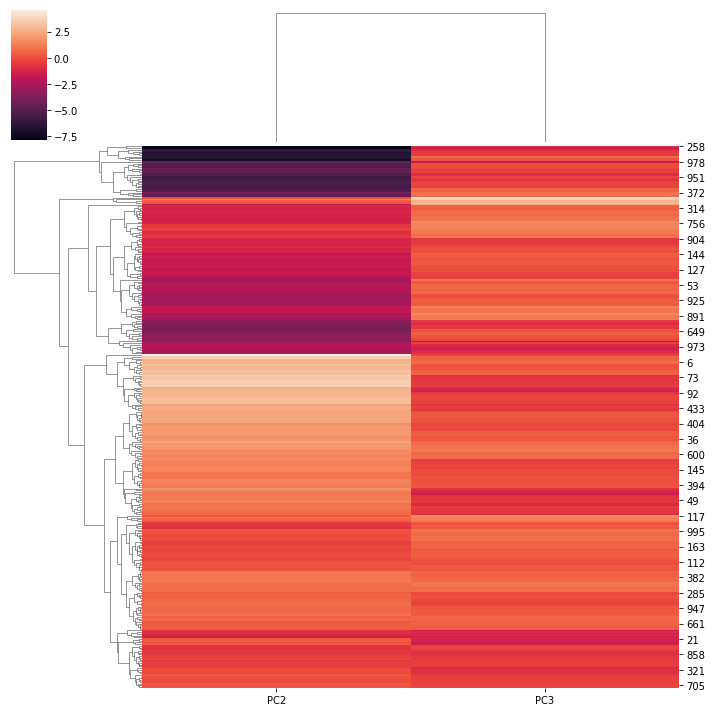

In [12]:
#cluster2 - can you rescue samples based on what signal remains?
clus2 = df['cluster']== 1   # 0 indexed
df_sub = df[clus2][['PC2','PC3']]
sns.clustermap(df_sub)

In [337]:
# Days in culture data
df1 = pd.read_csv("./NHP_BG_anal/2022_qIVSCC-METc_case_tracking.csv")
df1 = df1[['Slice ID', 'DIC']]
df2 = pd.read_csv("./NHP_BG_anal/2023_qIVSCC-METc_case_tracking.csv")
df2 = df2[['Slice ID', 'DIC (used)']]
df2 = df2.rename(columns={'DIC (used)': 'DIC'})

In [338]:
# Need to parse out Slice ID
df_slices = df1.append(df2)
df_slices = df_slices.reset_index(drop=True)
df_slices['Slice ID'] = [str.upper() for str in df_slices['Slice ID']]
df_slices['Slice ID'] = [str.split(' ')[0] for str in df_slices['Slice ID']]  # for 'QN23.26.011.17.01A (small section)'
# Make sure sheet has no leading spaces in Slice ID
df_slices['Slice ID']

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_36340/3003837460.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_slices = df1.append(df2)


0       QN22.26.011.14.56
1       QN22.26.011.15.53
2       QN22.26.011.15.54
3       QN22.26.011.14.55
4       QN22.26.014.14.51
              ...        
217     QN23.26.011.17.02
218     QN23.26.011.17.04
219     QN23.26.011.17.05
220    QN23.26.011.17.01A
221     QN23.26.011.17.06
Name: Slice ID, Length: 222, dtype: object

In [339]:
lengths = [len(str.split('.')) for str in df_slices['Slice ID']]
print(max(lengths))
print(min(lengths))

6
5


In [340]:
df = df[culture]

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_36340/1965108166.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[culture]


In [341]:
# Filter to 2022 or 2023 from first part of split
temp = [str.split('.')[0] for str in df['cell_name']]
#sl_year = [str[np.char.isnumeric([*str])].astype(int) for str in temp]
sl_year = [str[-2:] for str in temp]
filt = [str in ['22','23'] for str in [*sl_year]] 
df_filt = df[filt]
len(df_filt)

211

In [342]:
sl_name = ['.'.join(str.split('.')[:-1]) for str in df_filt['cell_name']]
sl_name = [str.upper() for str in sl_name]
df_filt['sl_name'] = sl_name
len(np.unique(sl_name))
sl_name

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_36340/2912293282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['sl_name'] = sl_name


['QN22.26.002.3A.01',
 'QN22.26.002.3A.01',
 'QN22.26.002.3A.02',
 'QN22.26.002.3A.02',
 'QN22.26.002.3A.02',
 'QM22.26.003.14.52',
 'QM22.26.003.14.52',
 'QM22.26.003.14.52',
 'QM22.26.003.14.52',
 'QM22.26.003.14.52',
 'QM22.26.003.14.55',
 'QM22.26.003.14.55',
 'QM22.26.003.14.55',
 'QM22.26.003.14.55',
 'QM22.26.003.14.55',
 'QM22.26.003.14.51',
 'QM22.26.003.14.51',
 'QM22.26.003.14.51',
 'QM22.26.003.14.51',
 'QM22.26.003.14.51',
 'QM22.26.003.14.58',
 'QM22.26.003.14.57',
 'QM22.26.003.14.57',
 'QM22.26.003.14.57',
 'QM22.26.003.14.57',
 'QM22.26.003.14.57',
 'QM22.26.003.14.57',
 'QN22.26.010.14.53',
 'QN22.26.010.14.53',
 'QN22.26.010.14.54',
 'QN22.26.010.14.54',
 'QN22.26.010.14.54',
 'QN22.26.010.14.54',
 'QN22.26.010.14.54',
 'QN22.26.010.14.51',
 'QN22.26.010.14.51',
 'QN22.26.010.14.51',
 'QN22.26.010.14.51',
 'QN22.26.010.14.52',
 'QN22.26.010.14.52',
 'QN22.26.010.14.55',
 'QN22.26.011.14.56',
 'QN22.26.011.14.56',
 'QN22.26.011.14.55',
 'QN22.26.011.14.55',
 'QN22.26.

In [343]:
print(sum([str in list(df_slices['Slice ID']) for str in df_filt['sl_name']]))
print(len(df_filt['sl_name']))

[str in list(df_slices['Slice ID']) for str in df_filt['sl_name']]

98
211


[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 

In [344]:
filt = [str in list(df_slices['Slice ID']) or str[:-1] in list(df_slices['Slice ID']) for str in df_filt['sl_name']]
np.array(sl_name)[[not b for b in filt]]

array(['QN22.26.002.3A.01', 'QN22.26.002.3A.01', 'QN22.26.002.3A.02',
       'QN22.26.002.3A.02', 'QN22.26.002.3A.02', 'QM22.26.003.14.52',
       'QM22.26.003.14.52', 'QM22.26.003.14.52', 'QM22.26.003.14.52',
       'QM22.26.003.14.52', 'QM22.26.003.14.55', 'QM22.26.003.14.55',
       'QM22.26.003.14.55', 'QM22.26.003.14.55', 'QM22.26.003.14.55',
       'QM22.26.003.14.51', 'QM22.26.003.14.51', 'QM22.26.003.14.51',
       'QM22.26.003.14.51', 'QM22.26.003.14.51', 'QM22.26.003.14.58',
       'QM22.26.003.14.57', 'QM22.26.003.14.57', 'QM22.26.003.14.57',
       'QM22.26.003.14.57', 'QM22.26.003.14.57', 'QM22.26.003.14.57',
       'QN22.26.010.14.53', 'QN22.26.010.14.53', 'QN22.26.010.14.54',
       'QN22.26.010.14.54', 'QN22.26.010.14.54', 'QN22.26.010.14.54',
       'QN22.26.010.14.54', 'QN22.26.010.14.51', 'QN22.26.010.14.51',
       'QN22.26.010.14.51', 'QN22.26.010.14.51', 'QN22.26.010.14.52',
       'QN22.26.010.14.52', 'QN22.26.010.14.55', 'QN22.26.019.14.51B',
       'QN22.26.019

In [345]:
df_filt = df_filt[filt]
#sl_name = np.array(sl_name)[filt]
# Sometimes the trailing "A" of Slice ID is not included in the slice ID tracking sheet

inds = [list(df_slices['Slice ID']).index(str) if str in list(df_slices['Slice ID']) 
        else list(df_slices['Slice ID']).index(str[:-1])
        for str in df_filt['sl_name']]
DICs = list(df_slices['DIC'][inds])

df_filt = df_filt.reset_index(drop=True)
df_filt['DIC'] = DICs

df_filt
# Filter and sort meta dataframe df to sl_name list, then tack on DICs
# Check


,Unnamed: 0,exp_component_name,Row.names,score.Corr,score.Tree,level1.class_Corr,level2.neighborhood_Corr,level3.subclass_Corr,cluster_Corr,level1.class_Tree,...,cluster_Tree_wglia,compound_qc_pass,cluster,PC1,PC2,PC3,PC4,PC5,sl_name,DIC
0,209,AB-S40305_S742_E1-50,AB-S40305_S742_E1-50,0.559535,0.43,IN,SLC17A6,SLC17A6,34_IN,IN,...,189_IN,True,4,8.248534,-6.770014,-0.810379,1.895572,0.637481,QN22.26.011.14.56,5.0
1,210,AB-S40305_S743_E1-50,AB-S40305_S743_E1-50,0.606620,0.19,IN,SST,SST_Chodl,18_IN,IN,...,19_NN,True,4,9.444541,-7.570636,-1.502496,2.433587,-0.649806,QN22.26.011.14.56,5.0
2,211,AB-S40306_S596_E1-50,AB-S40306_S596_E1-50,0.689130,0.62,IN,PVALB,PVALB-COL19A1-ST18,21_IN,IN,...,27_IN,True,3,1.319370,-2.673813,2.989783,-6.647289,2.693514,QN22.26.011.14.55,7.0
3,212,AB-S40306_S597_E1-50,AB-S40306_S597_E1-50,0.682556,0.45,MSN,D2-MSN,D2-Hybrid-MCHR2,55_MSN,MSN,...,19_NN,True,0,3.631196,0.471633,-0.007888,0.001891,0.603072,QN22.26.011.14.55,7.0
4,213,AB-S40306_S598_E1-50,AB-S40306_S598_E1-50,0.754521,0.91,IN,PVALB,PVALB-COL19A1-ST18,21_IN,IN,...,21_IN,True,5,0.759313,0.416864,7.010640,-2.406154,0.698852,QN22.26.011.14.55,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,806,AB-S40349_S657_E1-50,AB-S40349_S657_E1-50,0.421176,0.70,IN,SLC17A6,SLC17A6,105_IN,IN,...,26_NN,True,3,2.905922,-8.368413,-2.448748,-2.296848,0.896679,QN23.26.019.14.09A,7.0
160,807,AB-S40349_S658_E1-50,AB-S40349_S658_E1-50,0.467962,0.15,IN,SLC17A6,SLC17A6,105_IN,IN,...,6_NN,False,3,2.712206,-8.334603,-2.632153,-2.679779,-0.067108,QN23.26.019.14.09A,7.0
161,808,AB-S40349_S662_E1-50,AB-S40349_S662_E1-50,0.498536,0.40,IN,SN-STH,SN_STH,164_IN,IN,...,19_NN,True,4,11.167447,-13.411959,-2.211334,2.099176,-2.190166,QN23.26.019.14.06A,7.0
162,809,AB-S40349_S663_E1-50,AB-S40349_S663_E1-50,0.507173,0.58,IN,SN-STH,SN_STH,164_IN,IN,...,19_NN,True,4,11.652493,-14.484150,-2.967221,0.014336,-1.766792,QN23.26.019.14.06A,7.0


In [349]:
DICs

[5.0,
 5.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 8.0,
 7.0,
 7.0,
 9.0,
 9.0,
 6.0,
 6.0,
 6.0,
 6.0,
 7.0,
 7.0,
 8.0,
 8.0,
 2.0,
 2.0,
 2.0,
 2.0,
 10.0,
 8.0,
 8.0,
 7.0,
 7.0,
 7.0,
 7.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 7.0,
 7.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 7.0,
 7.0,
 7.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 6.0,
 6.0,
 6.0,
 6.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 8.0,
 8.0,
 8.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0]

In [346]:
df_slices['Slice ID']

0       QN22.26.011.14.56
1       QN22.26.011.15.53
2       QN22.26.011.15.54
3       QN22.26.011.14.55
4       QN22.26.014.14.51
              ...        
217     QN23.26.011.17.02
218     QN23.26.011.17.04
219     QN23.26.011.17.05
220    QN23.26.011.17.01A
221     QN23.26.011.17.06
Name: Slice ID, Length: 222, dtype: object

Text(0.5, 1.0, 'PC5 (Microglial genes)')

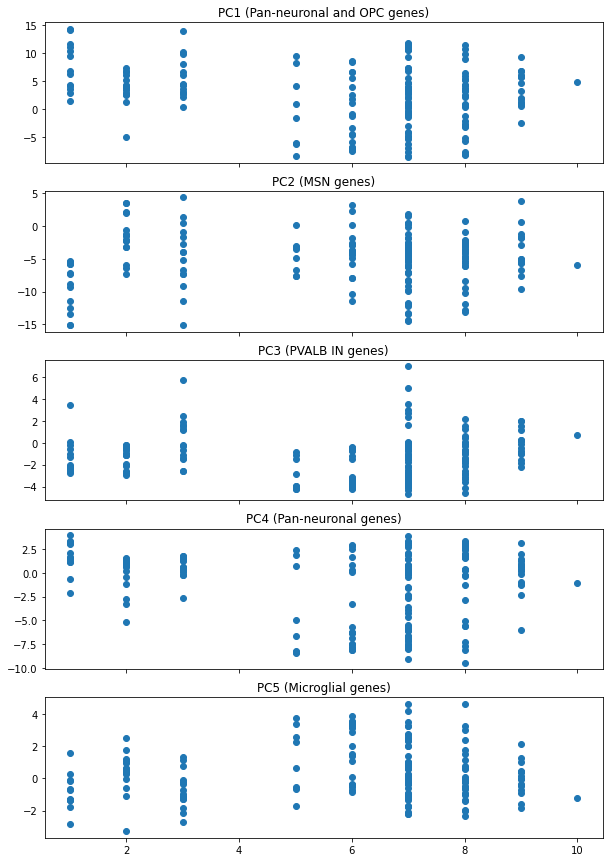

In [347]:
# Plot each PC versus DIC

fig, ax = plt.subplots(5,1,sharex=True, figsize=(10,15))
ax[0].scatter(df_filt['DIC'], df_filt['PC1'])
ax[0].set_title('PC1 (Pan-neuronal and OPC genes)')
ax[1].scatter(df_filt['DIC'], df_filt['PC2'])
ax[1].set_title('PC2 (MSN genes)')
ax[2].scatter(df_filt['DIC'], df_filt['PC3'])
ax[2].set_title('PC3 (PVALB IN genes)')
ax[3].scatter(df_filt['DIC'], df_filt['PC4'])
ax[3].set_title('PC4 (Pan-neuronal genes)')
ax[4].scatter(df_filt['DIC'], df_filt['PC5'])
ax[4].set_title('PC5 (Microglial genes)')

# PLOT BOX PLOTS INSTEAD

Text(0.5, 1.0, 'PC5 (Microglial genes)')

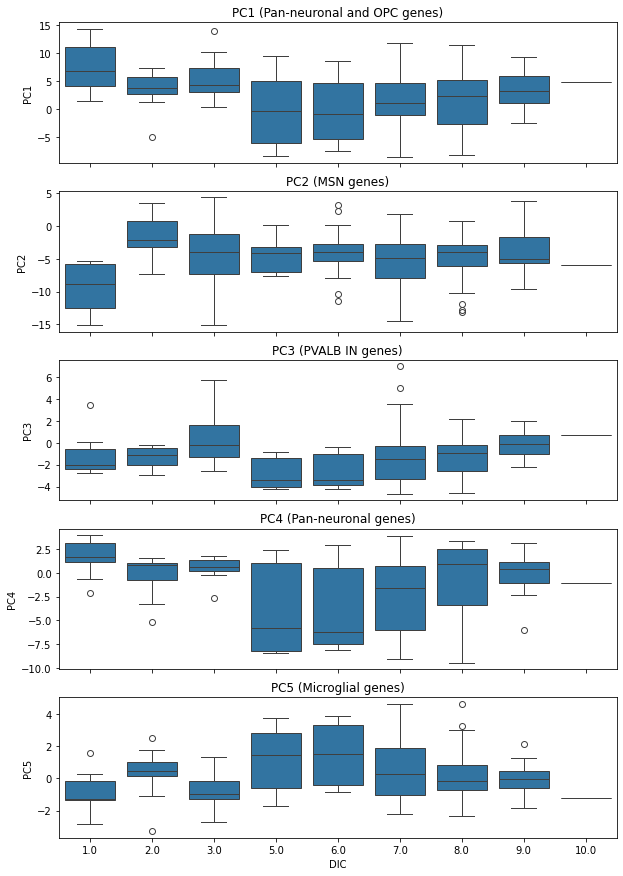

In [354]:
fig, ax = plt.subplots(5,1,sharex=True, figsize=(10,15))
sns.boxplot(x="DIC", y="PC1", data=df_filt, ax = ax[0])
ax[0].set_title('PC1 (Pan-neuronal and OPC genes)')
sns.boxplot(x="DIC", y="PC2", data=df_filt, ax = ax[1])
ax[1].set_title('PC2 (MSN genes)')
sns.boxplot(x="DIC", y="PC3", data=df_filt, ax = ax[2])
ax[2].set_title('PC3 (PVALB IN genes)')
sns.boxplot(x="DIC", y="PC4", data=df_filt, ax = ax[3])
ax[3].set_title('PC4 (Pan-neuronal genes)')
sns.boxplot(x="DIC", y="PC5", data=df_filt, ax = ax[4])
ax[4].set_title('PC5 (Microglial genes)')



Text(0.5, 1.0, 'Cluster 7 (CHAT)')

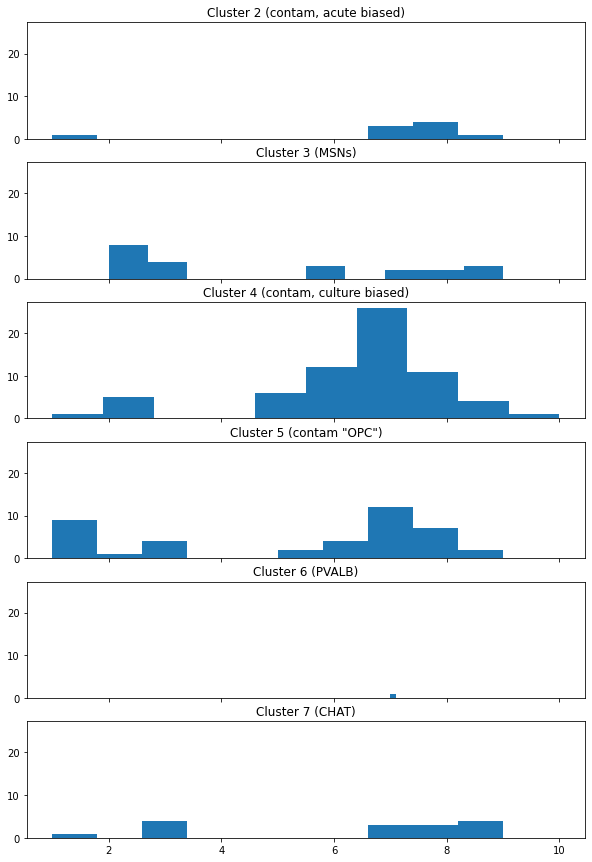

In [348]:
fig, ax = plt.subplots(6,1,sharex=True, sharey = True, figsize=(10,15))
ax[0].hist(df_filt[df_filt['cluster']==1]['DIC'])
ax[0].set_title('Cluster 2 (contam, acute biased)')
ax[1].hist(df_filt[df_filt['cluster']==2]['DIC'])
ax[1].set_title('Cluster 3 (MSNs)')
ax[2].hist(df_filt[df_filt['cluster']==3]['DIC'])
ax[2].set_title('Cluster 4 (contam, culture biased)')
ax[3].hist(df_filt[df_filt['cluster']==4]['DIC'])
ax[3].set_title('Cluster 5 (contam "OPC")')
ax[4].hist(df_filt[df_filt['cluster']==5]['DIC'])
ax[4].set_title('Cluster 6 (PVALB)')
ax[5].hist(df_filt[df_filt['cluster']==6]['DIC'])
ax[5].set_title('Cluster 7 (CHAT)')
#ax[1].hist(df[culture]['PC1'])
#ax[1].set_title('PC1 (cultured samples)')